# Run Code concurrently using Threading module

Using `Threading` when we want to significantly speed up a program. And this speed-up comes from running different tasks concurrently.

With the example below we can se the script doesn't do much on the CPU since it's just waiting around till the next function and at the end the script just finishes.

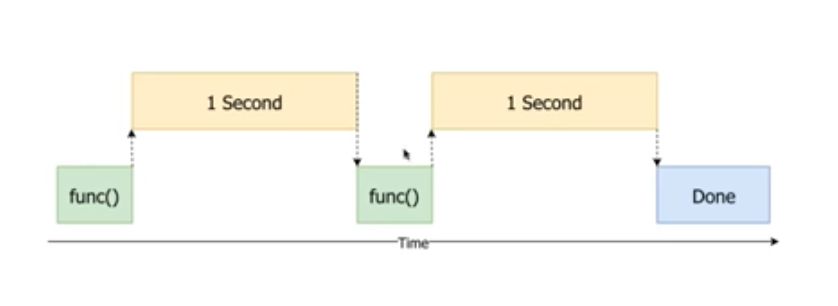

(Running the script with an order like this called running synchronously  which is a good sign that we can get benefits from `threading and concurrency` - CPU bound and i/o bound tasks).

- CPU bound tasks are actions that are crunching a lot of numbers and using the CPU.
- i/o bound tasks are actions that are just waiting for input and output operations to complete and actually not using the CPU much. For example, reading and writing from file system, downloading files online etc...

In [2]:
# Example

import time

start = time.perf_counter()

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print("Done Sleeping...")

do_something()
do_something()

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')


Sleeping 1 second...
Done Sleeping...
Sleeping 1 second...
Done Sleeping...
Finished in 2.01 second(s)


When we want to see the benefits when our tasks are i/o bound which means we will be doing a lot of waiting around for input and output operations, such as, reading data from disk or network operation. However, if our tasks are doing lot os data crunching which is CPU bound then we don't get much of a benefit from using threading.

Below picture shows us when we use `threading` with our code

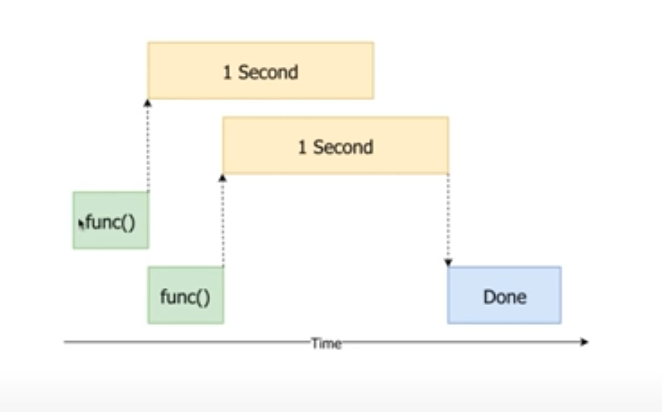

we can see there is an overlapped execution between 2 function but we never run any of this code at the same time. It's just give us the illusion of running code in parallel. Therefore, we can see our script finishes sooner than in the first picture.

In [3]:
import time
import threading

start = time.perf_counter()

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print("Done Sleeping...")
    
t1 = threading.Thread(target=do_something)
t2 = threading.Thread(target=do_something)

t1.start()
t2.start()

# using join method to make sure that both of these complete before moving on calculating the finish time and to print out this statement.
t1.join()
t2.join()

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')


Sleeping 1 second...
Sleeping 1 second...
Done Sleeping...Done Sleeping...

Finished in 1.0 second(s)


We can see our script done earlier because it ran concurrently and continued on with the rest of the script so it immediately came down and calculated our finish time here and printed out our last statement as our threads were still sleeping and once that one second was up our threads continued on and both printed that they were done sleeping.

Now we will try to run the script above in a for loop which we will run it 10 times.

In [5]:
import time
import threading

start = time.perf_counter()

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print("Done Sleeping...")
    
threads = []
for _ in range(10): # the underscore means it's a throwaway variable because all we want to do is a loop over ten numbers here
    t = threading.Thread(target=do_something)
    t.start()
    threads.append(t)

for thread in threads:
    thread.join()
    
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')


Sleeping 1 second...
Sleeping 1 second...Sleeping 1 second...

Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...Sleeping 1 second...Sleeping 1 second...


Sleeping 1 second...
Sleeping 1 second...
Done Sleeping...
Done Sleeping...Done Sleeping...Done Sleeping...Done Sleeping...Done Sleeping...Done Sleeping...
Done Sleeping...

Done Sleeping...



Done Sleeping...

Finished in 1.01 second(s)


We can see the script take online **1.01** second to finish which is much faster than the original script that can normally take about 10 seconds to finish.

Now we can adjust the script in order to give an argument into our `do_something()` function.

In [6]:
import time
import threading

start = time.perf_counter()

def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    print("Done Sleeping...")
    
threads = []
for _ in range(10): # the underscore means it's a throwaway variable because all we want to do is a loop over ten numbers here
    t = threading.Thread(target=do_something, args = [1.5]) # we expect our script to sleep 1.5 seconds
    t.start()
    threads.append(t)

for thread in threads:
    thread.join()
    
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')


Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...Sleeping 1.5 second(s)...

Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...Sleeping 1.5 second(s)...

Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Done Sleeping...
Done Sleeping...Done Sleeping...
Done Sleeping...

Done Sleeping...Done Sleeping...Done Sleeping...Done Sleeping...
Done Sleeping...



Done Sleeping...
Finished in 1.51 second(s)


**Again** we can see the script take online **1.51** second to finish which is much faster than the original script that can run sychronously and take about 15 seconds to finish.

Let's try a `thread pool executor` which in many cases, it will be an easier and more efficient way to run these threads. Above all, it lets us to easily switch over to using multiple processes instead of threads as well depending on the problem we are trying to solve.

Let's check example below:

In [9]:
import concurrent.futures

start = time.perf_counter()

def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return "Done Sleeping..." 

with concurrent.futures.ThreadPoolExecutor() as executor:
    f1 = executor.submit(do_something, 1) # submit() method schedules a function to be executed and returns a future object. Here we pass do_something() function with argument as 1 second.
    print(f1.result()) # the future object encapsulates the execution and allows us to check on it after it's been scheduled

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')


Sleeping 1 second(s)...
Done Sleeping...
Finished in 1.0 second(s)


We can see with the help of `thread pool executor`, the new script is much shorter than the original one.
Let's change the code if we want to run the process multiple times by using a list comprehension.

In [12]:
import concurrent.futures

start = time.perf_counter()

def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f"Done Sleeping...{seconds}" 

with concurrent.futures.ThreadPoolExecutor() as executor:
    secs = [5,4,3,2,1]
    results = [executor.submit(do_something, sec) for sec in secs] 
    
    for f in concurrent.futures.as_completed(results):
        print(f.result())
    
    
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')


Sleeping 5 second(s)...Sleeping 4 second(s)...
Sleeping 3 second(s)...

Sleeping 2 second(s)...Sleeping 1 second(s)...

Done Sleeping...1
Done Sleeping...2
Done Sleeping...3
Done Sleeping...4
Done Sleeping...5
Finished in 5.01 second(s)


As we can see the output that we ran the 5 seconds first but it appeared to be the last one finished than the other minutes because it printed out in the order that they completed.
With the submit method, it's submitting each function once at a time.

Let's try the `map()` method to run our function over a list of values.

In [14]:
import concurrent.futures

start = time.perf_counter()

def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f"Done Sleeping...{seconds}" 

with concurrent.futures.ThreadPoolExecutor() as executor:
    secs = [5,4,3,2,1]
    results = executor.map(do_something, secs)
    
    for result in results:
        print(result)
    
    
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')


Sleeping 5 second(s)...
Sleeping 4 second(s)...
Sleeping 3 second(s)...Sleeping 2 second(s)...
Sleeping 1 second(s)...

Done Sleeping...5
Done Sleeping...4
Done Sleeping...3
Done Sleeping...2
Done Sleeping...1
Finished in 5.0 second(s)


The process gave us a bit different output that the 5 seconds appeared in the first place because the results using map and it returns the results **in the order that they were started**. For example, we slept for 5 seconds first then we waited for that one to finish before printing out the other results.

Now we can go over a real world example that we will download multiple high resolution photos online and save them into our computer using threading. But first, we will see the script before and after using `threading` in order to see the time difference between 2 processes.

In [20]:
# Without using Threading

import requests
import time
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()


for img_url in img_urls:
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3]
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
Finished in 19.93702070100062 seconds


In [21]:
# Using Threading

import requests
import time
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()


def download_image(img_url):
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3]
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')


with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(download_image, img_urls)


t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
Finished in 19.26459964300011 seconds


We can see the speed-up between the 2 scripts is a bit different. It could make big difference when we have to handle more repetitive tasks in terms of downloading photos online to our computer.

END.